In [1]:
%load_ext autoreload
%autoreload 2

In [114]:
import tensorflow as tf
tf.__version__

'1.14.1'

In [2]:
import os
import matplotlib.pyplot as plt
import json
import math

In [148]:
split = 'val'

In [208]:
split = 'train'

In [4]:
split = 'test'

In [92]:
output_dir = "eraserbenchmark/outputs/"
img_dir = 'graphics/'
color = {'accuracy': 'r', 'sufficiency': 'g', 'comprehensiveness': 'b', 'auprc':'y'}

In [122]:
dataset = 'movies'
#rnr
train_on_portion = 0
par_lambdas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50.]
results_dirs = [output_dir + f"bert_base_seqlen_512_{dataset}_exp_output_rnr_merged_evidences{'_train_on_portion_'+str(train_on_portion) if train_on_portion != 0 else ''}_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__{split}.txt" for par_lambda in par_lambdas]
#movies
'''
#gru
par_lambdas = [10**i for i in range(-10, -2)] + [0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500 ] + [10**i for i in range(3, 19)]
par_lambdas = [10**i for i in range(-10, 19)]
results_dirs = [output_dir + f"bert_base_seqlen_512_eraser_movie_mtl_exp_output_gru_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__test.txt" for par_lambda in par_lambdas]
'''
baseline = {'accuracy': 0.974, 'sufficiency':  0.035, 'comprehensiveness': 0.113,
            'auprc':  0.467, "iou_f1": 0.124, 'token_f1': 0.322}

In [77]:
dataset = 'fever'
#rnr
train_on_portion = 0.1
par_lambdas = [0.001, 0.002, 0.005, 0.02, 0.03, 0.05, 0.1, 0.2, 0.5, 1., 2., 5.]
results_dirs = [output_dir + f"bert_base_seqlen_512_{dataset}_exp_output_rnr_merged_evidences{'_train_on_portion_'+str(train_on_portion) if train_on_portion != 0 else ''}_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__{split}.txt" for par_lambda in par_lambdas]

#gru
train_on_portion = 0.1
par_lambdas = [0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50., 100., 200., 500.]
results_dirs = [output_dir + f"bert_base_seqlen_512_fever_exp_output_gru_merged_evidences_train_on_portion_0.1_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__test.txt" for par_lambda in par_lambdas]

baseline = {'accuracy': 0.850, 'sufficiency':  0.077, 'comprehensiveness': 0.070,
            'auprc':  0.617, "iou_f1": 0.817, 'token_f1': 0.796}


In [143]:
dataset = 'multirc'
#gru
train_on_portion = 0.4
par_lambdas = [0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50., 100., 200., 500.]
results_dirs = [output_dir + f'bert_base_seqlen_512_multirc_exp_output_gru_merged_evidences_train_on_portion_0.4_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__test.txt' for par_lambda in par_lambdas]

#rnr
train_on_portion = 0.4
par_lambdas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2.]#, 5.]
results_dirs = [output_dir + f'bert_base_seqlen_512_multirc_exp_output_rnr_merged_evidences_train_on_portion_0.4_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__val.txt' for par_lambda in par_lambdas]

baseline = {'accuracy': 0.655,
            'sufficiency': 0.079,
            'comprehensiveness': 0.164,
            'auprc': 0.240,
            'iou_f1': 0.419,
            "token_f1": 0.456}

In [144]:
for results_dir in results_dirs:
    if not os.path.isfile(results_dir):
        print(results_dir)

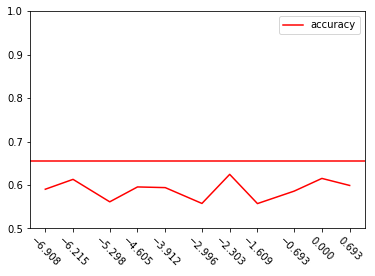

In [149]:
metrics = ['accuracy']

results = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = fin.read()
            r = eval(r[1:-1])
        results.append(r)
        for metric in metrics:
            y[metric].append(r['classification_scores'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
plt.ylim([0.5, 1])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_accuracy.png')

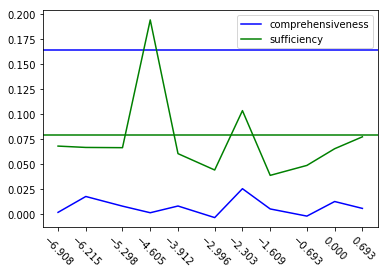

In [150]:
metrics = ["comprehensiveness", 'sufficiency']

results = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = fin.read()
            r = eval(r[1:-1])
        results.append(r)
        for metric in metrics:
            y[metric].append(r['classification_scores'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_cs.png')

In [108]:
metrics = ['auprc']

results = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = fin.read()
            r = eval(r[1:-1])
        results.append(r)
        for metric in metrics:
            y[metric].append(r['token_soft_metrics'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
#plt.ylim([0.5, 1])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_accuracy.png')

KeyError: 'token_soft_metrics'

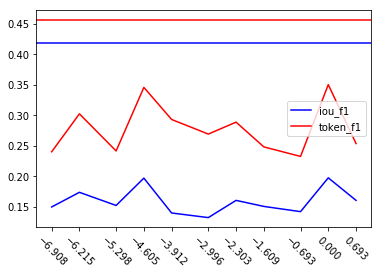

In [151]:
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
plt.axhline(y=baseline['iou_f1'], color='b', linestyle='-')
ax.plot([math.log(i) for i in par_lambdas], [results[i]['iou_scores'][0]['macro']['f1']
                                             for i in range(len(par_lambdas))], label='iou_f1', color='b')
plt.axhline(y=baseline['token_f1'], color='r', linestyle='-')
ax.plot([math.log(i) for i in par_lambdas], [results[i]['token_prf']['instance_micro']['f1']
                                             for i in range(len(par_lambdas))], label='token_f1', color='r')

ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_iou_token_f1.png')

In [127]:
results[-4]

{'iou_scores': [{'threshold': 0.5,
   'micro': {'p': 0.12857142857142856,
    'r': 0.013062409288824383,
    'f1': 0.023715415019762848},
   'macro': {'p': 0.12012987012987013,
    'r': 0.01896447356404342,
    'f1': 0.032757618833778354}}],
 'rationale_prf': {'instance_micro': {'p': 0.004761904761904762,
   'r': 0.0004837929366231253,
   'f1': 0.0008783487044356608},
  'instance_macro': {'p': 0.002512562814070352,
   'r': 0.0010050251256281408,
   'f1': 0.0014357501794687727}},
 'token_prf': {'instance_micro': {'p': 0.40316175053017156,
   'r': 0.21816057419462528,
   'f1': 0.2831187468692038},
  'instance_macro': {'p': 0.3460435134672575,
   'r': 0.23871916094322326,
   'f1': 0.23986496817289923}},
 'classification_scores': {'accuracy': 0.8743718592964824,
  'prf': {'NEG': {'precision': 0.9411764705882353,
    'recall': 0.8,
    'f1-score': 0.8648648648648648,
    'support': 100},
   'POS': {'precision': 0.8245614035087719,
    'recall': 0.9494949494949495,
    'f1-score': 0.88262910